# Mini Project using the League Of Legends API

This project is aimed at understanding how the API provided by Riot Games for its different games works. Other related APIS will be added.

In [65]:
import json

with open('secrets.json') as f:
    secrets = json.load(f)
    
api_key = secrets["api_key"]

In [3]:
api_url = 'https://la1.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5'

In [4]:
import requests
import os
import pandas as pd

In [5]:
requests.get(api_url)

<Response [401]>

In [6]:
api_url = api_url + '?api_key=' + api_key

In [34]:
response = requests.get(api_url)
response

<Response [200]>

In [33]:
json_data = response.json()

In [10]:
json_data

{'tier': 'CHALLENGER',
 'leagueId': '9e47028a-50c9-3edd-a3d4-e2bdc642d3fa',
 'queue': 'RANKED_SOLO_5x5',
 'name': "Cassiopeia's Legion",
 'entries': [{'summonerId': 'tEyR4yOIFHH9wPcPCxITlYlJXu8vP78UxB6OxMQGoTtKrg',
   'summonerName': 'JaNr',
   'leaguePoints': 746,
   'rank': 'I',
   'wins': 291,
   'losses': 261,
   'veteran': False,
   'inactive': False,
   'freshBlood': True,
   'hotStreak': False},
  {'summonerId': 'a1UeURJWRWT3JIICgB1rmE9CRALOQdG4L7ZNqm_rsWau',
   'summonerName': 'iam fine infinit',
   'leaguePoints': 951,
   'rank': 'I',
   'wins': 179,
   'losses': 153,
   'veteran': True,
   'inactive': False,
   'freshBlood': False,
   'hotStreak': False},
  {'summonerId': '3qPvD2Bju4nmJXg10ISLvHU2GjRGWR8Kruim2KlXvJLs',
   'summonerName': 'pce',
   'leaguePoints': 1071,
   'rank': 'I',
   'wins': 128,
   'losses': 93,
   'veteran': False,
   'inactive': False,
   'freshBlood': False,
   'hotStreak': False},
  {'summonerId': 'dEp9zXbsyHvySNNWk7KH0l1b2LQoNwKxjkcwX36kipq0',
   's

In [11]:
import csv

In [12]:
csv_file_path = os.path.join('C:/Users/Andres/Desktop/CSVs','datos_api_LOL.csv')

In [13]:
if 'entries' in json_data:
    
    entries = json_data['entries']
    
    if entries:
        
        fieldnames = entries[0].keys()
        
        with open(csv_file_path,'w',newline='',encoding='utf-8') as csvfile:
        
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(entries)
    else:
        print('list "entries" is empty.')
else:
    print('key "entries" is not present at API response.')   

In [14]:
dataset_path = 'C:/Users/Andres/Desktop/CSVs/datos_api_LOL.csv'

In [15]:
df_LOL = pd.read_csv(dataset_path)

In [16]:
column_clean = ['summonerId','rank','veteran','inactive']
df_LOL1 = df_LOL.drop(column_clean,axis=1)

In [17]:
print(df_LOL1.head())

       summonerName  leaguePoints  wins  losses  freshBlood  hotStreak
0              JaNr           746   291     261        True      False
1  iam fine infinit           951   179     153       False      False
2               pce          1071   128      93       False      False
3     Apêx Predator           827    71      39       False      False
4             nizeR           781   222     194        True       True


In [18]:
LP1400 = df_LOL1[df_LOL['leaguePoints']>=1380]
LP1400 = LP1400.sort_values('leaguePoints',ascending=False)
print(LP1400)

         summonerName  leaguePoints  wins  losses  freshBlood  hotStreak
173               z z          1889   196     126       False      False
74           Meguıtan          1825   263     148       False      False
147       Sparkaholic          1678   255     190       False      False
167       DeadIy Mark          1550   236     178       False      False
104  GatitaCaliente69          1526   169     114       False       True
156             Sylas          1511   113      59       False      False
128            lnside          1510   160      90       False      False
27              Jauny          1455   105      64       False      False
126               Ýun          1417   178     134       False      False
105         ína y ani          1413   115      54       False      False
15               kiss          1402   326     269       False      False


In [19]:
LP1400['totalGames'] = LP1400['wins'] + LP1400['losses']
LP1400

,summonerName,leaguePoints,wins,losses,freshBlood,hotStreak,totalGames
173,z z,1889,196,126,False,False,322
74,Meguıtan,1825,263,148,False,False,411
147,Sparkaholic,1678,255,190,False,False,445
167,DeadIy Mark,1550,236,178,False,False,414
104,GatitaCaliente69,1526,169,114,False,True,283
156,Sylas,1511,113,59,False,False,172
128,lnside,1510,160,90,False,False,250
27,Jauny,1455,105,64,False,False,169
126,Ýun,1417,178,134,False,False,312
105,ína y ani,1413,115,54,False,False,169


In [20]:
LP1400['Winrate'] = (LP1400['wins'] / LP1400['totalGames']) * 100
LP1400['Winrate'] = LP1400['Winrate'].round(1)
LP1400

,summonerName,leaguePoints,wins,losses,freshBlood,hotStreak,totalGames,Winrate
173,z z,1889,196,126,False,False,322,60.9
74,Meguıtan,1825,263,148,False,False,411,64.0
147,Sparkaholic,1678,255,190,False,False,445,57.3
167,DeadIy Mark,1550,236,178,False,False,414,57.0
104,GatitaCaliente69,1526,169,114,False,True,283,59.7
156,Sylas,1511,113,59,False,False,172,65.7
128,lnside,1510,160,90,False,False,250,64.0
27,Jauny,1455,105,64,False,False,169,62.1
126,Ýun,1417,178,134,False,False,312,57.1
105,ína y ani,1413,115,54,False,False,169,68.0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

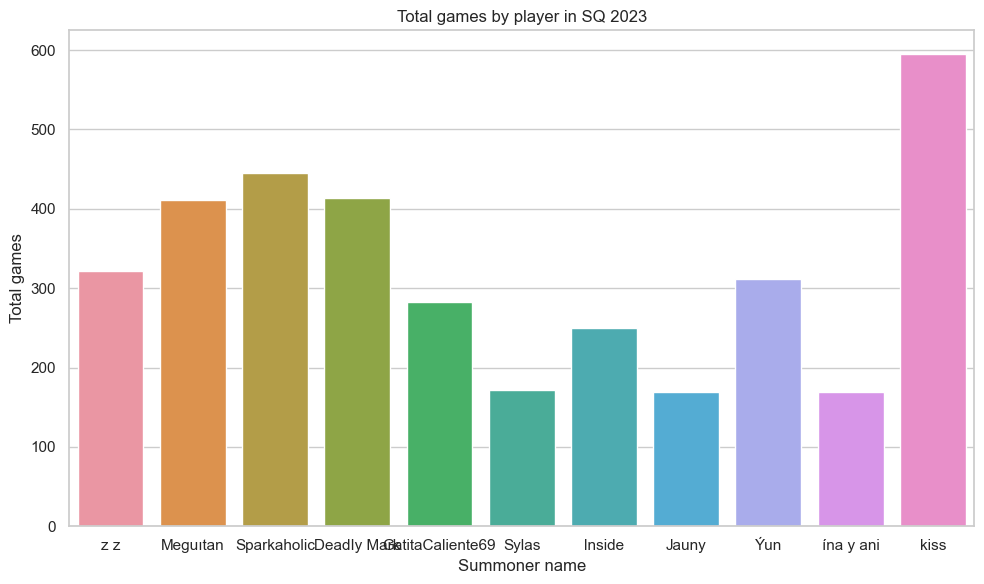

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

sns.barplot(data=LP1400, x='summonerName', y='totalGames')

plt.ylabel('Total games')
plt.xlabel('Summoner name')
plt.title('Total games by player in SQ 2023')

plt.tight_layout()

plt.show()

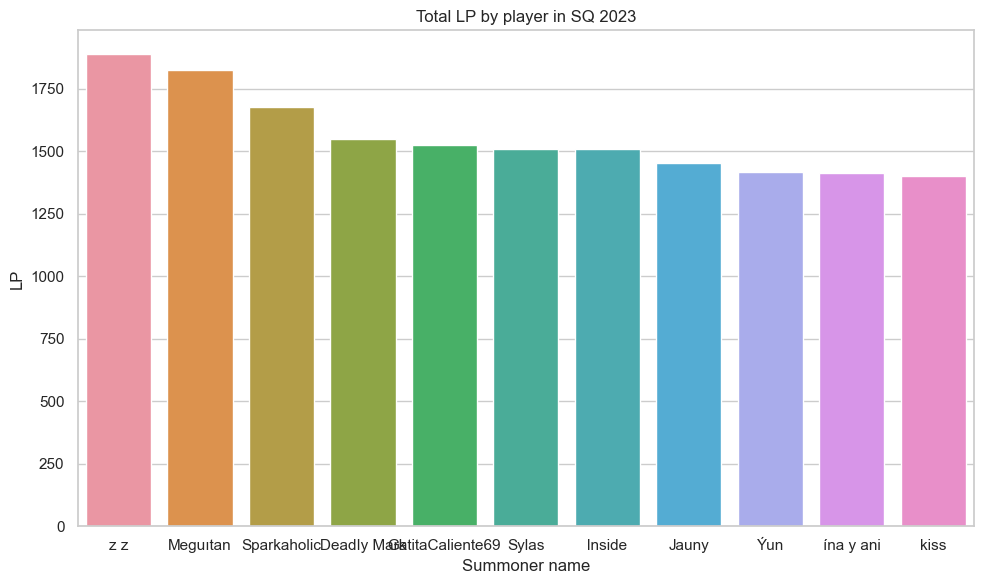

In [23]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

sns.barplot(data=LP1400, x='summonerName', y='leaguePoints')

plt.ylabel('LP')
plt.xlabel('Summoner name')
plt.title('Total LP by player in SQ 2023')

plt.tight_layout()

plt.show()

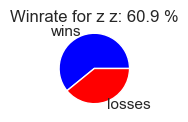

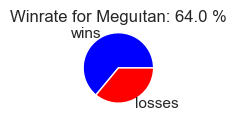

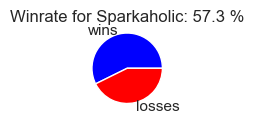

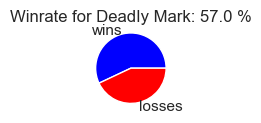

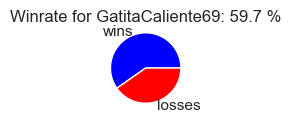

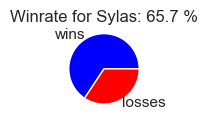

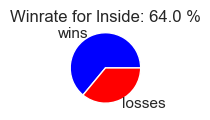

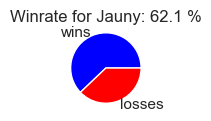

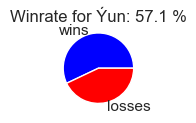

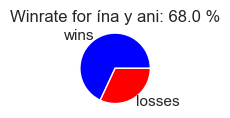

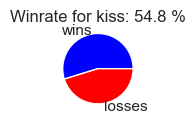

In [24]:
for index, row in LP1400.iterrows():

    plt.figure(figsize=(1, 1))
    sizes = [row['wins'], row['losses']]
    labels = ['wins','losses']
    colors = ['blue','red']
    
    plt.pie(sizes, labels=labels, colors=colors)
    plt.axis('equal')
    
    plt.title(f"Winrate for {row['summonerName']}: {row['Winrate']} %")
    
    plt.show()

# Mastery Points from my Acc

In [68]:
api_url_acc = 'https://la1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-puuid/ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RBdecvQ01NFlT3jqbVALNNeJsOkwxt7r6g'

In [69]:
api_url_with_key = api_url_acc + '?api_key=' + api_key 

In [70]:
response = requests.get(api_url_with_key)
print(response.status_code)

200


In [49]:
json_data = response.json()
json_data

[{'puuid': 'ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RBdecvQ01NFlT3jqbVALNNeJsOkwxt7r6g',
  'championId': 76,
  'championLevel': 7,
  'championPoints': 202508,
  'lastPlayTime': 1702260569000,
  'championPointsSinceLastLevel': 180908,
  'championPointsUntilNextLevel': 0,
  'chestGranted': False,
  'tokensEarned': 0,
  'summonerId': 'SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7'},
 {'puuid': 'ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RBdecvQ01NFlT3jqbVALNNeJsOkwxt7r6g',
  'championId': 54,
  'championLevel': 7,
  'championPoints': 138665,
  'lastPlayTime': 1701390478000,
  'championPointsSinceLastLevel': 117065,
  'championPointsUntilNextLevel': 0,
  'chestGranted': False,
  'tokensEarned': 0,
  'summonerId': 'SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7'},
 {'puuid': 'ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RBdecvQ01NFlT3jqbVALNNeJsOkwxt7r6g',
  'championId': 27,
  'championLevel': 6,
  'championPoints': 136422,
  'lastPlayTime': 1701903997000,
  'championPointsSinceLa

In [52]:
import json

In [61]:
# json Filename
json_filename = 'C:/Users/Andres/Desktop/CSVs/json/json_data'

# Save in a Json File
with open(json_filename, 'w', encoding='utf-8') as json_file:
    json.dump(json_data, json_file, ensure_ascii=False, indent=4)

print(f'Data is saved in {json_filename}.')

Data is saved in C:/Users/Andres/Desktop/CSVs/json/json_data.


In [62]:
lol_acc = pd.read_json(r"C:/Users/Andres/Desktop/CSVs/json/json_data")
lol_acc.to_csv(r"C:/Users/Andres/Desktop/CSVs/lol_acc_data.csv")

In [63]:
lol_acc

,puuid,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId
0,ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RB...,76,7,202508,1702260569000,180908,0,False,0,SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7
1,ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RB...,54,7,138665,1701390478000,117065,0,False,0,SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7
2,ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RB...,27,6,136422,1701903997000,114822,0,False,0,SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7
3,ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RB...,104,6,123066,1701666692000,101466,0,False,1,SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7
4,ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RB...,64,5,122107,1701747907000,100507,0,True,2,SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7
...,...,...,...,...,...,...,...,...,...,...
138,ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RB...,72,1,119,1527473405000,119,1681,False,0,SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7
139,ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RB...,429,1,118,1630555482000,118,1682,False,0,SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7
140,ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RB...,134,1,112,1533510619000,112,1688,False,0,SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7
141,ZqxSlmXnoczXpVCvmoWwrCW4sWtm8l9_mIouDyYN7Pq7RB...,80,1,105,1628899160000,105,1695,False,0,SYrNNcuBTbsP5582u_ygIu6FgS6AvS2pu7BicVM1JAt-05q7
